In [1]:
import csv
from collections import defaultdict, Counter
import seaborn as sns

/home/oychang/.virtualenvs/crime/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
dates = [
    ['2013-12-7', '2013-12-18'],
    ['2013-4-27', '2013-5-8'],
    ['2012-12-1', '2012-12-12'],
    ['2012-4-28', '2012-5-9'],
    ['2011-12-3', '2011-12-14'],
    ['2011-4-30', '2011-5-13'],
    ['2010-12-4', '2010-12-14'],
    ['2010-5-1', '2010-5-12'],
    ['2009-12-5', '2009-12-16'],
    ['2009-5-2', '2009-5-13'],
    ['2008-12-6', '2008-12-17'],
    ['2008-4-26', '2008-5-7'],
    ['2007-12-1', '2007-12-12'],
]

In [3]:
from datetime import datetime

In [4]:
s_to_d = lambda s: datetime.strptime(s, '%Y-%m-%d')
pad = lambda s: '0' + s if len(s) == 1 else s
pad_ds = lambda s: '-'.join(pad(x) for x in s.split('-'))

In [5]:
dates_dt = [
    [s_to_d(pad_ds(dls[0])), s_to_d(pad_ds(dls[1]))]
    for dls in dates
]

In [6]:
def during_finals(d):
    for date_range in dates_dt:
        if d >= date_range[0] and d <= date_range[1]:
            return True
    return False

In [7]:
data = [r for r in csv.reader(open('./data/umpd-2007-to-2013-crime-mapping-cleaned.csv'))]

In [8]:
list(enumerate(data[0]))

[(0, 'address'),
 (1, 'apt'),
 (2, 'case'),
 (3, 'offense_code'),
 (4, 'offense'),
 (5, 'date_rept'),
 (6, 'date_occu'),
 (7, 'hour_occu'),
 (8, 'date_fnd'),
 (9, 'hour_fnd'),
 (10, 'lat'),
 (11, 'lon')]

In [9]:
data_finals = [
    r for r in data[1:]
    if during_finals(s_to_d(r[6]))
]

In [10]:
data_nonfinals = [r for r in data[1:] if r not in data_finals]

In [11]:
def get_days(table_rows):
    first_day, last_day = min(s_to_d(r[6]) for r in table_rows), max(s_to_d(r[6]) for r in table_rows)
    return (last_day - first_day).days

In [12]:
total_recorded_days = get_days(data[1:])
total_crimes_per_day = len(data[1:]) / total_recorded_days

In [13]:
finals_recorded_days = sum((date_range[1] - date_range[0]).days for date_range in dates_dt)
finals_crimes_per_day = len(data_finals) / finals_recorded_days

In [14]:
nonfinals_recorded_days = total_recorded_days - finals_recorded_days
nonfinals_crimes_per_day = len(data_nonfinals) / nonfinals_recorded_days

In [15]:
[total_crimes_per_day, finals_crimes_per_day, nonfinals_crimes_per_day, finals_crimes_per_day / nonfinals_crimes_per_day]

[3.185344827586207, 3.4444444444444446, 3.1698504983388704, 1.0866267813732768]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

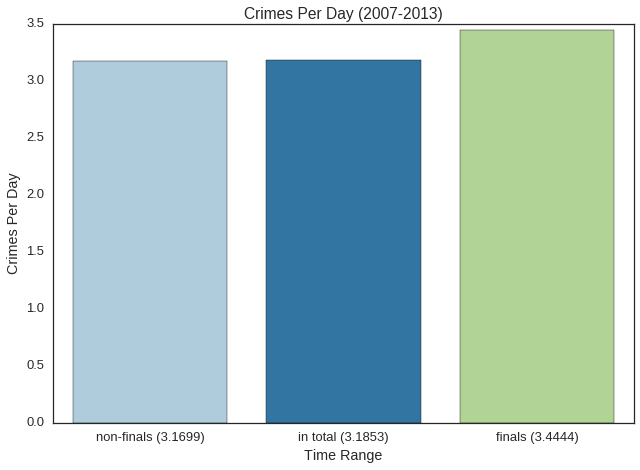

In [17]:
sns.set(style="white", context="talk")
sns.plt.title('Crimes Per Day (2007-2013)')
ax = sns.barplot(['non-finals (3.1699)', 'in total (3.1853)', 'finals (3.4444)', ],
            [nonfinals_crimes_per_day, total_crimes_per_day, finals_crimes_per_day, ],
            palette="Paired")
ax.set(ylabel='Crimes Per Day', xlabel='Time Range')

In [18]:
finals_offenses = Counter(r[3] for r in data_finals)
nonfinals_offenses = Counter(r[3] for r in data_nonfinals)

In [24]:
total_finals_offenses = sum(finals_offenses.values())
total_nonfinals_offenses = sum(nonfinals_offenses.values())

In [53]:
offense_descriptions = defaultdict(set)
for r in data[1:]:
    offense_descriptions[r[3]].add(r[4])

In [68]:
print('top 10 crimes non-finals\n')
top10_nonfinals = reversed(sorted(nonfinals_offenses.items(), key=lambda s: tuple(s)[1])[-10:])
for code, count in top10_nonfinals:
    percent = (count/total_nonfinals_offenses) * 100
    description = list(offense_descriptions[code])[0]
    print('{:-5.2f}%\t{}\t{}\t{}'.format(percent, count, code, description))
print('total: \t{}'.format(total_nonfinals_offenses))

top 10 crimes non-finals

14.44%	1102	VEI	VEHICLE PARKING OFFENSE SCOFF LAW
 7.97%	608	THF	THEFT FROM STRUCTURE WITH LEGAL ACCESS PUBLIC BUILDING
 7.55%	576	FDD	FD INJURED PERSON
 7.55%	576	PRA	TRESPASSING
 7.40%	565	ZOA	TRESPASS WARNING
 4.26%	325	PRB	PROPERTY LOST
 3.98%	304	ZOM	SIMPLE ASSAULT THREATS
 3.84%	293	VEL	VEHICLE TRAFFIC CRASH
 2.91%	222	TVE	THEFT OF BICYCLE
 2.80%	214	THK	THEFT OTHER
total: 	7633


In [67]:
print('top 10 crimes finals\n')
top10_finals = reversed(sorted(finals_offenses.items(), key=lambda s: tuple(s)[1])[-10:])
for code, count in top10_finals:
    percent = (count/total_finals_offenses) * 100
    description = list(offense_descriptions[code])[0]
    print('{:-5.2f}%\t{}\t{}\t{}'.format(percent, count, code, description))
print('total: \t{}'.format(total_finals_offenses))

top 10 crimes finals

10.48%	52	VEI	VEHICLE PARKING OFFENSE SCOFF LAW
 9.68%	48	THF	THEFT FROM STRUCTURE WITH LEGAL ACCESS PUBLIC BUILDING
 9.48%	47	PRA	TRESPASSING
 8.06%	40	FDD	FD INJURED PERSON
 5.24%	26	ZOA	TRESPASS WARNING
 4.64%	23	ZOM	SIMPLE ASSAULT THREATS
 4.64%	23	VEL	VEHICLE TRAFFIC CRASH
 3.23%	16	THK	THEFT OTHER
 3.23%	16	PRB	PROPERTY LOST
 2.82%	14	THC	THEFT FROM MOTOR VEHICLE
total: 	496
